<font size="10">Słowniczek</font>


Klasa __LinearRegression__ z scikit-learn służy do wykonywania regresji liniowej. Pozwala na modelowanie zależności liniowych między zmienną zależną a jedną lub więcej zmiennymi niezależnymi.

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Funkcja __train_test_split__ dzieli dane na zestawy treningowe i testowe. Jest niezbędna do oceny modelu na niewidzianych danych, co pozwala na lepsze zrozumienie jego ogólnej wydajności.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Klasa __PolynomialFeatures__ generuje nową macierz cech składającą się z wszystkich kombinacji cech o stopniu mniejszym lub równym określonemu stopniowi. Używana w regresji wielomianowej do tworzenia cech wyższego stopnia.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


__StandardScaler__ standaryzuje cechy poprzez usunięcie średniej i skalowanie do jednostkowej wariancji. Jest to szczególnie ważne, gdy cechy mają różne zakresy, ponieważ algorytmy oparte na odległości mogą być na nie wrażliwe.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Funkcja __mean_squared_error__ oblicza błąd średniokwadratowy (MSE), który jest standardową metryką do oceny modeli regresji. MSE jest średnią kwadratów różnic między przewidywanymi a rzeczywistymi wartościami.

In [8]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

<font size="10">Regresja liniowa wielu zmiennych</font>


**Opis**
Regresja liniowa wielu zmiennych (nazywana regresją wieloraką), znana także jako wielowymiarowa regresja liniowa, to statystyczna metoda używana do modelowania związku między dwiema lub więcej zmiennymi niezależnymi (predyktorami) a zmienną zależną (odpowiedzią). 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<font size="6">Zadanie 1</font>

Przygotuj model regresji wielu zmiennych na podstawie danych odnośnie domów w Kaliforni
[Te zadanie jest zrobione należy je tylko uruchomić i przeanalizować kod]

In [10]:
#Wczytanie odpowiednich bibliotek:
import numpy as np  # Biblioteka NumPy używana jest do obliczeń numerycznych
import pandas as pd  # Biblioteka Pandas jest używana do manipulacji danymi i analizy,
from sklearn.datasets import fetch_california_housing  # Funkcja fetch_california_housing z biblioteki scikit-learn służy do pobierania zestawu danych dotyczących cen domów w Kalifornii
from sklearn.model_selection import train_test_split  # Funkcja train_test_split z biblioteki scikit-learn jest używana do dzielenia danych na zestawy treningowe i testowe, co pozwala ocenić skuteczność modelu na danych
from sklearn.linear_model import LinearRegression  # Klasa LinearRegression z biblioteki scikit-learn jest używana do budowania modelu regresji liniowej
from sklearn.metrics import mean_squared_error  # Funkcja mean_squared_error z biblioteki scikit-learn jest używana do obliczenia błędu średniokwadratowego między wartościami przewidywanymi przez model a rzeczywistymi wartościami, co jest miarą jakości modelu regresji.

# Wczytanie danych
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target, columns=['MedianHouseValue'])  #tutaj mogło by być dowolnie co innego nie tylko MedianHouseValue


# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Inicjalizacja modelu
model = LinearRegression()

# Trenowanie modelu
model.fit(X_train, y_train)

# Przewidywanie cen na zbiorze testowym
y_pred = model.predict(X_test)

# Obliczenie błędu średniokwadratowego
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.555891598695244


<font size="5">Skalowanie</font>

Załóżmy, że mamy dane o domach, gdzie jedna z cech to powierzchnia w metrach kwadratowych (np. 50, 150, 250 m²), a druga to cena w złotówkach (np. 500000, 1500000, 2500000 zł). Bez skalowania, cecha ceny dominuje z powodu dużo wyższych wartości liczbowych, co może zakłócić proces uczenia.

**Przed skalowaniem:**

-Powierzchnia 50, 150, 20

-Cena: 500000, 1500000, 25000


__Po skalowaniu__ (StandardScaler, który odejmuje średnią i dzieli przez odchylenie standardowe): **

-Powierzchnia po skalowaniu: -1, 0, 1 (przykładowe wartości po transformacji)

-Cena po skalowaniu: -1, 0, 1 (przykładowe wartości po transformacji)


Jak widać, po skalowaniu obie cechy mają podobny zakres i rozkład, co sprawia, że każda z nich ma równy wpływ na modelowanie. Każda cecha przyczynia się w podobny sposób do wyników algorytmu, co zwiększa skuteczność modelu.










Skalowanie cech (lub skalowanie danych) to proces przekształcania wartości różnych zmiennych tak, aby znajdowały się w podobnym zakresie. Dzięki temu algorytmy uczenia maszynowego mogą lepiej i szybciej działać, ponieważ żadna z cech nie dominuje nad innymi ze względu na różnice w skali.

.



In [11]:
# Wczytanie danych
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target, columns=['MedianHouseValue'])  

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalowanie cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicjalizacja modelu
model = LinearRegression()

# Trenowanie modelu na przeskalowanych danych
model.fit(X_train_scaled, y_train)

# Przewidywanie cen na przeskalowanym zbiorze testowym
y_pred = model.predict(X_test_scaled)

# Obliczenie błędu średniokwadratowego
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 0.5558915986952444


<font size="5">Pytania</font>
1. Czy dodanie skalowania wpłynęło na MSE ?
2. Jakie widzisz różnice w regresji liniowej jednej zmiennej do regresji liniowej wielu zmiennych?

<font size="6">Zadanie 2 - wina, regresja liniowa wielu zmiennych</font>

1. Załadowanie i przygotowanie danych do analizy -> load_wine
2. Przeprowadzenie eksploracji danych, w tym sprawdzenie statystyk opisowych.
3. Podział danych na zbiór treningowy i testowy.
4. Zbudowanie modelu regresji liniowej wielu zmiennych do przewidzenia jakości wina.
5. Ocena modelu za pomocą metryki błędu średniokwadratowego (MSE).

<font size="10">Regresja wielomianowa</font>


**Opis**
Regresja wielomianowa to rozszerzenie regresji liniowej, które pozwala modelować zależności bardziej złożone niż prosta linia. 

In [154]:
import numpy as np  
import pandas as pd  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_wine

class DescriptiveStatistics:
    @staticmethod
    def run():
        print('Number of null in records in dataset:')
        print(X.isnull().sum())
        print(y.isnull().sum())
        print(X.describe())
        print(y.describe())
        
        name_column = list(data['feature_names'])
        for name in name_column:

            plt.title(f'boxplot of {name}')
            plt.xlabel(name)
            plt.ylabel('Value')
            plt.boxplot(X[name])
            plt.show()

            plt.title(f'hist of {name}')
            plt.xlabel(name)
            plt.ylabel('Value')
            plt.hist(X[name])
            plt.show()
                 
        
# Wczytanie danych
data = load_wine()

X = pd.DataFrame(data.data, columns=data['feature_names'])
y = pd.DataFrame(data.target, columns=['Quality'])
# DescriptiveStatistics.run()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicjalizacja modelu
model = LinearRegression()

# Trenowanie modelu na przeskalowanych danych
model.fit(X_train_scaled, y_train)

# Przewidywanie cen na przeskalowanym zbiorze testowym
y_pred = model.predict(X_test_scaled)

# Obliczenie błędu średniokwadratowego
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.0685334846425599


<font size="6">Zadanie 3</font>

Przygotowałem dla Państwa zadanie do wykonania, które polega na zastosowaniu regresji wielomianowej do przewidywania cen mieszkań w zależności od jednej wybranej cechy, np. wielkości mieszkania (powierzchni), aby pokazać, jak wpływa ona na cenę.
Na ten moment stopień wielomianu jest równy 1, proszę poeksperymentować.

In [42]:
#Na razie wypiszmy sobie wszystkie kolumny ze zbioru Kalifornia
column_names = california.feature_names
column_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
#Teraz przejdźmy do kodu

MSE - Linear Regression: 0.7091157771765548
MSE - Polynomial Regression: 1 0.7091157771765549
MSE - Linear Regression: 0.7091157771765548
MSE - Polynomial Regression: 2 0.7032732680932144
MSE - Linear Regression: 0.7091157771765548
MSE - Polynomial Regression: 3 0.6982964744960334
MSE - Linear Regression: 0.7091157771765548
MSE - Polynomial Regression: 4 0.6981042443894434
MSE - Linear Regression: 0.7091157771765548
MSE - Polynomial Regression: 5 0.6987158425288906
MSE - Linear Regression: 0.7091157771765548
MSE - Polynomial Regression: 6 0.6959703899326934
MSE - Linear Regression: 0.7091157771765548
MSE - Polynomial Regression: 7 0.6931443805797208
MSE - Linear Regression: 0.7091157771765548
MSE - Polynomial Regression: 8 0.6926991027596243
MSE - Linear Regression: 0.7091157771765548
MSE - Polynomial Regression: 9 0.6926816386321664
MSE - Linear Regression: 0.7091157771765548
MSE - Polynomial Regression: 10 0.6927678104107576
MSE - Linear Regression: 0.7091157771765548
MSE - Polynomia

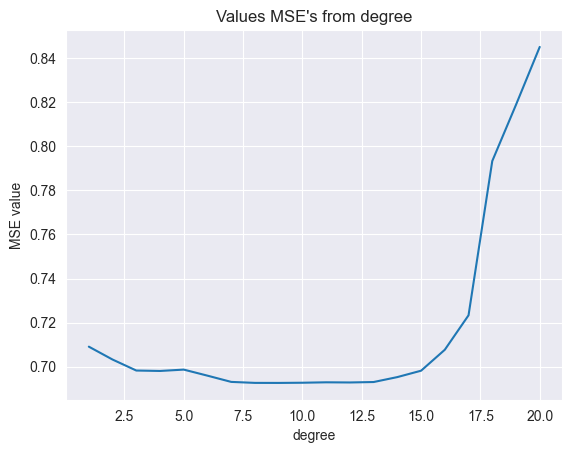

In [177]:
from numpy import inf
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Wczytanie danych
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target, columns=['MedianHouseValue'])

# Wybór jednej cechy, np. 'MedInc' (median income)
X = X[['MedInc']]

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresja liniowa dla porównania
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)

# Transformacja wielomianowa cechy
MSEs = []
for degree in range(1,21):
    poly = PolynomialFeatures(degree=degree)  # TUTAJ ZMIENIAMY STOPIEŃ WIELOMIANU
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Regresja wielomianowa
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    
    # Wyniki
    MSEs.append(mse_poly)
    print("MSE - Linear Regression:", mse_lin)
    print("MSE - Polynomial Regression:", degree, mse_poly)
    
    
    # # Wizualizacja
    # plt.figure(figsize=(10, 6))
    # plt.scatter(X_test, y_test, color='black', label='Actual prices')
    # plt.scatter(X_test, y_pred_lin, color='blue', label='Linear model predictions')
    # plt.scatter(X_test, y_pred_poly, color='red', label='Polynomial model predictions', alpha=0.5)
    # plt.xlabel('Median Income')
    # plt.ylabel('Median House Value')
    # plt.title('Comparison of Linear and Polynomial Regression')
    # plt.legend()
    # plt.show()
    
print(f'Najlepszy wynik {min(enumerate([inf]+MSEs),key=lambda index: index[1])}')
plt.plot([*range(21)],[None] + MSEs)
plt.title('Values MSE\'s from degree')
plt.xlabel('degree')
plt.ylabel('MSE value')
plt.show()

<font size="5">Pytania</font>
1. Jakie będzie MSE dla wielomianu 5 i 9 stopnia?
2. Jaki stopień wielomianu będzie miał najmniejsze MSE?
3. Która regresja działa lepiej?

MSE od 5 = 0.6987158425288906; MSE od 9 = 0.6926816386321664 

Jeśli kryterium dobrego działania modelu jest MSE, to model regresji 9-ego stopnia jest najlepszy.

<font size="6">Zadanie 4</font>

Proszę wykorzystać regresję wielomianową, aby zbudować model przewidujący zużycie paliwa samochodów (mierzone jako liczba mil na galon - MPG) na podstawie ich cech, takich jak pojemność silnika, liczba cylindrów, waga, i inne.

__Dane__
Dane możesz pobrać z repozytorium UCI Machine Learning Repository oraz wrzucam na UBI

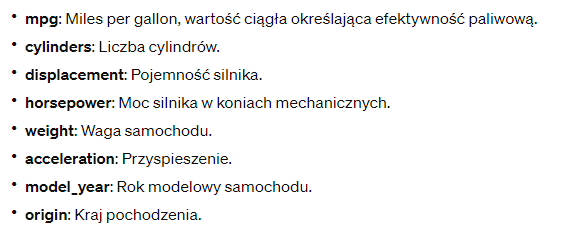

In [ ]:
'''
Kroki do wykonania:
1. Załadowanie danych: Wczytaj dane do środowiska Pythona, np. przy użyciu pandas.
2. Czyszczenie danych: Upewnij się, że dane są czyste (brak wartości null, odpowiedni format danych).
3. Eksploracja danych: Przeprowadź analizę statystyczną i wizualną danych.
4. Przygotowanie danych: Wybierz cechy, które mają być użyte do modelowania. Ja wybrałem horsepower i weight, Państwo mogą wybrać inne.
5. Podział na zbiory: Podziel dane na zbiór treningowy i testowy.
6. Stworzenie modelu regresji wielomianowej: Użyj PolynomialFeatures z sklearn.preprocessing do stworzenia cech wielomianowych. Następnie zastosuj regresję liniową.
7. Trenowanie modelu: Wytrenuj model na danych treningowych.
8. Ewaluacja modelu: Oceń model na zbiorze testowym za pomocą MSE i innych metryk.
9. Interpretacja wyników: Zinterpretuj wyniki, zwracając uwagę na to, które cechy mają największy wpływ na efektywność paliwową.
'''

Najlepszy wynik MSE (3, 15.744655077557772)
Najlepszy wynik R^2 (3, 0.6915267405239922)


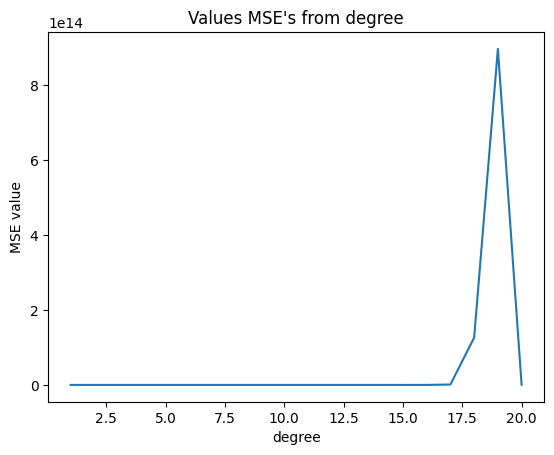

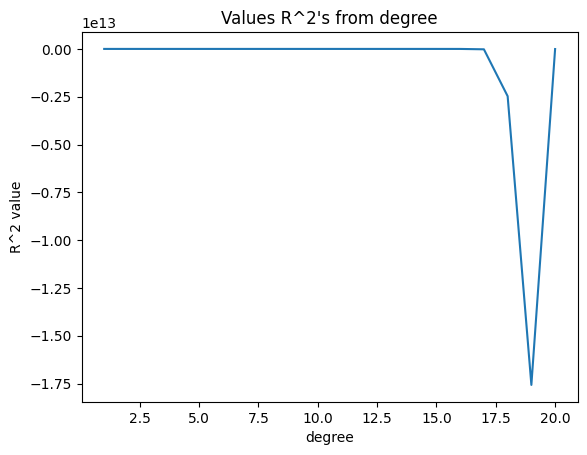

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from numpy import inf

class DescriptiveStatistics:
    @staticmethod
    def run():
        print('Number of null in records in dataset:')
        print(data.isnull().sum())
        print(y.isnull().sum())
        print(data.describe())
        print(y.describe())
        
        name_column = list(X.keys())
        print(name_column)
        for name in name_column:

            plt.title(f'boxplot of {name}')
            plt.xlabel(name)
            plt.ylabel('Value')
            plt.boxplot([float(value) for value in list(X[name])])
            plt.show()

            plt.title(f'hist of {name}')
            plt.xlabel(name)
            plt.ylabel('Value')
            plt.hist([float(value) for value in list(X[name])])
            plt.show()



# Załadowanie danych
data = pd.read_csv('auto-mpg.csv')
data = data[data['horsepower'] != '?']


# Podział danych

X = data[['horsepower', 'weight']]  # Przykładowe cechy
y = data['mpg']
# DescriptiveStatistics.run()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalowanie cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MSEs = []
r2 = []
for degree in range(1,21):

    poly = PolynomialFeatures(degree=degree)  # TUTAJ ZMIENIAMY STOPIEŃ WIELOMIANU
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    # Regresja wielomianowa
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)
    
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    
    MSEs.append(mse_poly)
    r2.append(r2_poly)
    
    # print("R^2 - Polynomial Regressi:", degree, r2_poly)
    # print("MSE - Polynomial Regression:", degree, mse_poly)
    
    
    
print(f'Najlepszy wynik MSE {min(enumerate([inf]+MSEs),key=lambda index: index[1])}')
print(f'Najlepszy wynik R^2 {max(enumerate([-inf]+r2),key=lambda index: index[1])}')

plt.plot([*range(21)],[None] + MSEs)
plt.title('Values MSE\'s from degree')
plt.xlabel('degree')
plt.ylabel('MSE value')
plt.show()

plt.plot([*range(21)],[None] + r2)
plt.title('Values R^2\'s from degree')
plt.xlabel('degree')
plt.ylabel('R^2 value')
plt.show()


<font size="6">Zadanie 5</font>

Przygotowałem dla Pani/Pana zadanie do wykonania na regresję wielomianową, które wykorzystuje popularny zbiór danych Iris dostępny w bibliotece scikit-learn. Zbiór danych Iris zawiera pomiary dla 150 kwiatów irysów, obejmujących trzy gatunki. Celem zadania będzie użycie regresji wielomianowej do modelowania zależności między długością płatka a jego szerokością dla danego gatunku irysów.

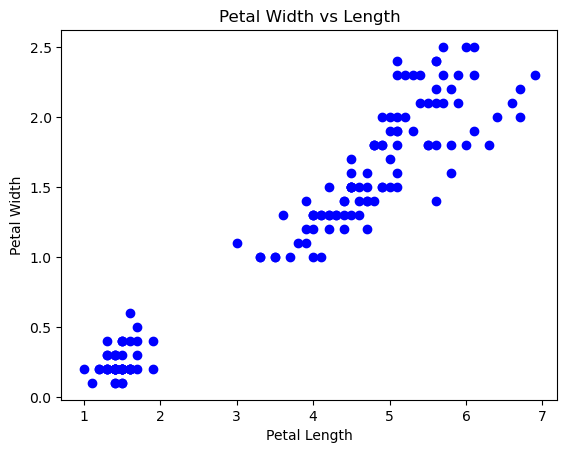

In [5]:
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error, r2_score


# Wczytanie danych
iris = load_iris()
X = iris.data[:, 2].reshape(-1, 1)  # petal length
y = iris.data[:, 3]  # petal width

# Wizualizacja danych
plt.scatter(X, y, color='blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Width vs Length')
plt.show()

# Podział na zbiór treningowy i testowy

# Transformacja wielomianowa cech


# Trenowanie modelu regresji liniowej


# Przewidywanie na danych testowych

# Obliczenie błędów MSE i R^2





<font size="5">Pytania</font>
1. Jakie będzie MSE dla wielomianu 5 i 9 stopnia?
2. Proszę wyliczyć R^2 i MSE dla wielomianu 2 stopnia
3. jaki stopień wielomianu najlepiej modeluje zależności w danych?

<font size="5">Pytania ogólne</font>
1. Jak wpływają stopnie wielomianu na kształt krzywej regresji w modelu wielomianowym?
2. Jakie są zalety stosowania regresji wielomianowej nad regresją liniową?
3. Proszę podać swój numer indeksu.

1)Ona na kształt krzywej regresji.Im wyższy stopień, tym bardziej krzywa może być skomplikowana. Wyższe stopniepozwalają modelowi lepiej dopasować się do danych, ale istnieje ryzyko nadmiernego dopasowania. 
2)Elastyczność

3)21595